# Wrangling Data

## Imports

In [1000]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Gathering data

#### Extratcting data from .csv file

In [1010]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [1011]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Extracting data from file programmatically .tsv

In [1012]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [1013]:
os.listdir(folder_name)

['image-predictions.tsv']

In [1014]:
df_image_prediction=pd.read_csv('image-predictions.tsv', sep= '\t')

In [1015]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1016]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1017]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Extracting data from JSON.txt file

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [1018]:
df_list= []
with open("tweet-json.txt","r") as file:
    lines = file.readlines()
    for i in lines:
        obj = json.loads(i)
        df_list.append({'tweet_id': obj['id'],
                'retweet_count': obj['retweet_count'],
                'favorite_count': obj['favorite_count']
               })
df_api=pd.DataFrame(df_list, columns= ['tweet_id','retweet_count','favorite_count'])

In [1019]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Assessing data

#### Quality
##### `archive` table
- name column with 'a' and 'none' values
- doggo, fluffer, pupper and puppo columns with 'None' values
- timestamp column data type should be datatime (to_datetime)
- retweeted_status_timestamp data type should be datatime
- Incorrect and weird values of rating_denominator
- expanded_url column missing values
- in_reply_to_status_id and in_reply_to_user_id columns missing values
- retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp missing values
- the row count doesn't match `image_prediction` table's row count, some tweets don't have images

##### `image_predictoins` table
- table's header from value to variable

##### `api` table
- the row count doesn't match `image_prediction` table's row count, some tweets don't have images

#### Tidiness
- retweet count and favourit count column in `api` table should be in `archive` table
- fix column names in `image_prediction` table
- text column got both string text of the tweet and url of the image
- doggo, fluffer, pupper and puppo columns should be one column 

## Cleaning the data

### Quality

In [1020]:
archive_clean = df_archive.copy()
image_clean = df_image_prediction.copy()
api_clean = df_api.copy()

##### `archive` table

#### Define
The name column got 'a' and 'none' values that need to be replaced with NaN using .replace()

#### Code

In [1021]:
archive_clean['name']= archive_clean['name'].replace('None', np.nan)
archive_clean['name']= archive_clean['name'].replace('a', np.nan)

#### Test

In [1022]:
archive_clean['name'].value_counts()

Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
               ..
infuriating     1
Kaia            1
Tupawc          1
Butters         1
Mollie          1
Name: name, Length: 955, dtype: int64

#### Define
doggo, floofer, pupper and puppo columns with 'None' values need to be replaced with NaN using .replace()

#### Code

In [1023]:
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')

#### Test

In [1024]:
archive_clean['doggo'].value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [1025]:
archive_clean['floofer'].value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [1026]:
archive_clean['pupper'].value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [1027]:
archive_clean['puppo'].value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

#### Define
Timestamp column data type should be datatime (to_datetime)

year, month , day needs to be extracted

year column was extracted for visualization purposes later on

#### Code

In [1028]:
archive_clean['timestamp']= archive_clean.timestamp.str.extract(r'(\d{4}-\d{2}-\d{2})', expand= True)
archive_clean['year'] = archive_clean.timestamp.str.extract(r'(\d{4})', expand= True)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['year'] = pd.to_numeric(archive_clean['year'])

#### Testing

In [1029]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### Define
timestamp column data type should be datatime (to_datetime)

#### Code

In [1030]:
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

#### Testing

In [1031]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns]     
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Fixing incorrect and weird values of rating_denominator [2,0,7]

we can fix the incorrect values by querying the values and fetching the index in order to check the text of the tweet itself
after checking the text of the tweet we replace the values with the correct ones

#### Code

In [1032]:
archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [1033]:
archive_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,NaN,,,,,2017


In [1034]:
archive_clean.text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [1035]:
archive_clean = archive_clean.replace({'rating_denominator' : 0}, 10)

In [1036]:
archive_clean.text[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [1037]:
archive_clean = archive_clean.replace({'rating_numerator' : 960}, 13)

In [1038]:
archive_clean.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
2335,666287406224695296,NaN,NaN,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,1,2,an,,,,,2015


In [1039]:
archive_clean = archive_clean.replace({'rating_denominator' : 2}, 10)

In [1040]:
archive_clean = archive_clean.replace({'rating_numerator' : 1}, 9)

In [1041]:
archive_clean.query('rating_denominator == 7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
516,810984652412424192,NaN,NaN,2016-12-19,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,,,,,2016


In [1042]:
archive_clean.text[516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [1043]:
archive_clean = archive_clean.replace({'rating_denominator' : 7}, np.nan)

In [1044]:
archive_clean = archive_clean.replace({'rating_numerator' : 24}, np.nan)

#### Testing

In [1045]:
archive_clean.rating_denominator[313]

10.0

In [1046]:
archive_clean.rating_numerator[313]

13.0

In [1047]:
archive_clean.rating_denominator[2335]

10.0

In [1048]:
archive_clean.rating_numerator[2335]

9.0

In [1049]:
archive_clean.rating_numerator[516]

nan

In [1050]:
archive_clean.rating_denominator[516]

nan

In [1051]:
archive_clean.rating_denominator.unique()

array([ 10.,  15.,  70.,  nan,  11., 150., 170.,  20.,  50.,  90.,  80.,
        40., 130., 110.,  16., 120.])

In [1052]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns]     
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2355 non-null   float64         

#### Define
The row count of `df_archive` doesn't match `df_image_prediction` table's row count, as some tweets don't have images

In order to solve this, we select rows whose column value is in an iterable, image_clean['tweet_id'], use isin

jpg_url colum and img_num needs to be moved to `archive` table

#### Code

In [1053]:
archive_clean = pd.merge(archive_clean, image_clean, on = ['tweet_id'], how = "left")
archive_clean= archive_clean.drop(['p1', 'p2', 'p3', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis=1)

In [1054]:
archive_clean = archive_clean.loc[archive_clean['tweet_id'].isin(image_clean['tweet_id'])]


#### Testing

In [1055]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2075 non-null   datetime64[ns]     
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2074 non-null   float64         

#### Define
expanded_urls column missing values

After the filtering of the data by image_clean[tweet_id], null values of expanded_urls dropped

#### Test

In [1056]:
sum(archive_clean.expanded_urls.isnull())

0

#### Define
in_reply_to_status_id and in_reply_to_user_id columns missing values

After the filtering of the data by image_clean[tweet_id], there is no need for in_reply_to_status_id and in_reply_to_user_id columns for our analysis

#### Code

In [1057]:
archive_clean= archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [1058]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   timestamp                   2075 non-null   datetime64[ns]     
 2   source                      2075 non-null   object             
 3   text                        2075 non-null   object             
 4   retweeted_status_id         81 non-null     float64            
 5   retweeted_status_user_id    81 non-null     float64            
 6   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 7   expanded_urls               2075 non-null   object             
 8   rating_numerator            2074 non-null   float64            
 9   rating_denominator          2074 non-null   float64            
 10  name                        1442 non-null   object          

#### Define
retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp missing values

After the filtering of the data by image_clean[tweet_id], there is no need for retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp as we got all the tweet ids that have images for our final analysis

#### Code

In [1059]:
archive_clean= archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [1060]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   int64         
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   text                2075 non-null   object        
 4   expanded_urls       2075 non-null   object        
 5   rating_numerator    2074 non-null   float64       
 6   rating_denominator  2074 non-null   float64       
 7   name                1442 non-null   object        
 8   doggo               2075 non-null   object        
 9   floofer             2075 non-null   object        
 10  pupper              2075 non-null   object        
 11  puppo               2075 non-null   object        
 12  year                2075 non-null   int64         
 13  jpg_url             2075 non-null   object      

#### Define
##### `api` table
The row count doesn't match image_prediction table's row count, some tweets don't have images

before tidying the `archive` table and merging tweet_count and favorite_count

#### Code

In [1061]:
api_clean = api_clean.loc[api_clean['tweet_id'].isin(image_clean['tweet_id'])]

#### Test

In [1062]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2073 non-null   int64
 1   retweet_count   2073 non-null   int64
 2   favorite_count  2073 non-null   int64
dtypes: int64(3)
memory usage: 64.8 KB


#### Define
##### `image_predictoins` table
table's header from value to variable, use wide_to_long function to combine p1,p2,p3 in one column, p1_conf,p2_conf,p3_conf in one column, p1_dog,p2_dog,p3_dog in one column

Drop img_num and jpg_url as it is already moved to `archive` table

It will be a multi-dimentional dataframe

#### Tidiness
some tidiness will be done to the table before melting, changing column names

#### Code

In [1063]:
image_clean.columns = ['tweet_id','jpg_url','img_num','prediction_1','confidence_1','is_dog_1',
                       'prediction_2','confidence_2','is_dog_2','prediction_3','confidence_3','is_dog_3']
image_clean= image_clean.drop(columns=['img_num', 'jpg_url'])
image_clean = pd.wide_to_long(image_clean, stubnames = ["prediction","confidence","is_dog"],
                   i=["tweet_id"], j="trial", sep="_", suffix="\w+")

#### Test

In [1064]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6225 entries, (666020888022790149, 1) to (892420643555336193, 3)
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prediction  6225 non-null   object 
 1   confidence  6225 non-null   float64
 2   is_dog      6225 non-null   bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 378.0+ KB


In [1065]:
image_clean.head()

,,prediction,confidence,is_dog
tweet_id,trial,,,
666020888022790149,1,Welsh_springer_spaniel,0.465074,True
666029285002620928,1,redbone,0.506826,True
666033412701032449,1,German_shepherd,0.596461,True
666044226329800704,1,Rhodesian_ridgeback,0.408143,True
666049248165822465,1,miniature_pinscher,0.560311,True


In [1066]:
image_clean.shape

(6225, 3)

### Tidiness

#### Define
`archive` table 

text column got both string text of the tweet and url of the image, they both should be separated with Regex

#### Code

In [1067]:
archive_clean['text_url'] = archive_clean.text.str.extract('(?P<url>https?://[^\s]+)', expand= True)
archive_clean['text_tweet'] = archive_clean.text.str.extract('(.*.\d/\d+)',expand = True)
archive_clean = archive_clean.drop('text', axis=1)

#### Test

In [1068]:
archive_clean.text_url[25]

'https://t.co/4Ad1jzJSdp'

In [1069]:
archive_clean.text_tweet[25]

'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10'

In [1070]:
archive_clean.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,jpg_url,img_num,text_url,text_tweet
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,2017,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,2017,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,2017,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...


#### Define
`archive` table 

doggo, floofer, pupper, puppo should be concatenated under one column dog_stage

#### Code

In [1071]:
archive_clean['dog_stage']= archive_clean.doggo + archive_clean.puppo + archive_clean.pupper + archive_clean.floofer

In [1072]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

In [1073]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggopupper','doggo-pupper')

In [1074]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggopuppo', 'doggo-puppo')

In [1075]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggofloofer', 'doggo-floofer')

In [1076]:
archive_clean = archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1)

#### Test

In [1077]:
archive_clean['dog_stage'].value_counts()

pupper           211
doggo             67
puppo             23
doggo-pupper      11
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [1078]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   int64         
 1   timestamp           2075 non-null   datetime64[ns]
 2   source              2075 non-null   object        
 3   expanded_urls       2075 non-null   object        
 4   rating_numerator    2074 non-null   float64       
 5   rating_denominator  2074 non-null   float64       
 6   name                1442 non-null   object        
 7   year                2075 non-null   int64         
 8   jpg_url             2075 non-null   object        
 9   img_num             2075 non-null   float64       
 10  text_url            2075 non-null   object        
 11  text_tweet          2072 non-null   object        
 12  dog_stage           321 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), obje

#### Define

Merging `archive` table with `api` table using merge()

retweet count and favourit count column in api table should be in archive table

#### Code

In [1079]:
df_combined= pd.merge(archive_clean, api_clean, on= 'tweet_id')

#### Test

In [1080]:
df_combined.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,year,jpg_url,img_num,text_url,text_tweet,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,NaN,8853,39467
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,NaN,6514,33819
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,NaN,4328,25461
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,NaN,8964,42908
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,NaN,9774,41048


In [1081]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   int64         
 1   timestamp           2073 non-null   datetime64[ns]
 2   source              2073 non-null   object        
 3   expanded_urls       2073 non-null   object        
 4   rating_numerator    2072 non-null   float64       
 5   rating_denominator  2072 non-null   float64       
 6   name                1441 non-null   object        
 7   year                2073 non-null   int64         
 8   jpg_url             2073 non-null   object        
 9   img_num             2073 non-null   float64       
 10  text_url            2073 non-null   object        
 11  text_tweet          2070 non-null   object        
 12  dog_stage           320 non-null    object        
 13  retweet_count       2073 non-null   int64       

## Visualization

All the visualization was done on tableau

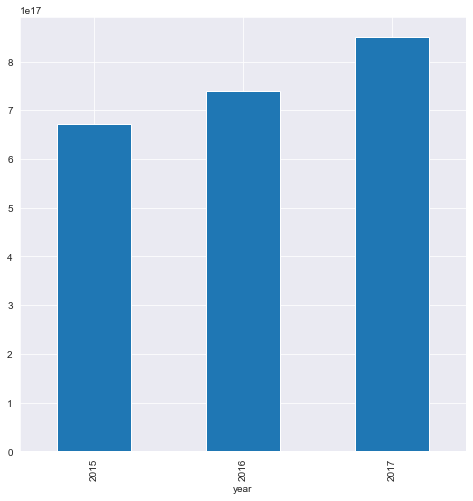

In [1099]:
df_combined.groupby('year')['tweet_id'].mean().plot(kind='bar',figsize=(8,8));

## Saving to .CSV

In [1091]:
df_combined.to_csv('combined_archive.csv', encoding='utf-8')

In [1092]:
image_clean.to_csv('image_prediction.csv', encoding='utf-8')